Import libraries
# Necessary library to Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv("E:\Internship\student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


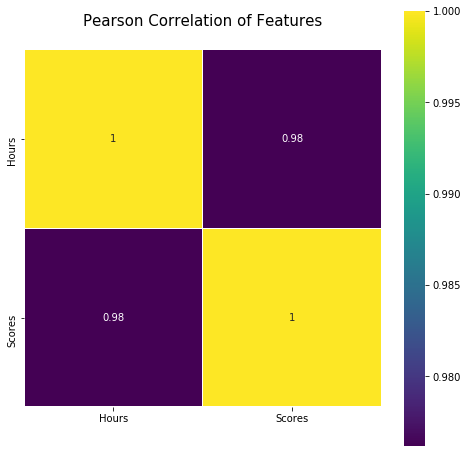

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

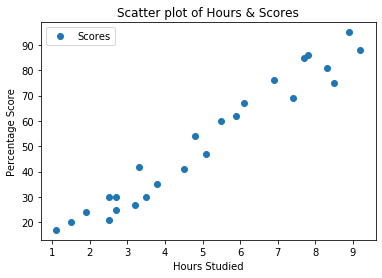

In [9]:
df.plot(x = 'Hours', y ='Scores', style = 'o')
plt.title('Scatter plot of Hours & Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Preparing the data

In [10]:
#Independent variable
X = df['Hours']

# Dependent variable
y = df['Scores']

In [11]:
#Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.20)

In [12]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [13]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
#Fit linear regression model to trainingset
from sklearn.linear_model import LinearRegression
# Linear Regression Model
linreg = LinearRegression()

In [15]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("Intercept=",linreg.intercept_)
print("Slope=",linreg.coef_)

Intercept= [2.01816004]
Slope= [[9.91065648]]


In [17]:
#Test the model's generalization ability using testset
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [18]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score
#Compute the performance of the model using metrics
print("RMSE=", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Rsquare=",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))

RMSE= 4.6474476121003665
Rsquare= 0.9454906892105356
Mean Absolute Error: 4.183859899002975


In [20]:
# You can also test with your own data
hours = 9.25
hours = np.array(hours)
hours = hours.reshape(1, -1)
own_pred = linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[9.25]]
Predicted Score = [[93.69173249]]
